# Funciones de distribución de probabilidades


### Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def randint_list(n, a, b):
    x = []
    for i in range(n):
        x.append(np.random.randint(a,b))
    return x

(array([100042., 100046., 100186., 100517., 100522.,  99099.,  99739.,
        100124.,  99683., 100042.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

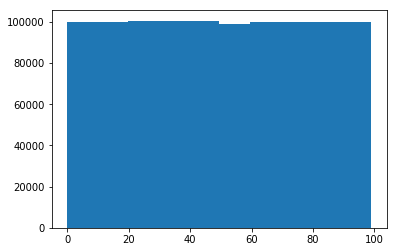

In [3]:
%matplotlib inline
plt.hist(randint_list(1000000, 0, 100))

### Distribución Normal

In [4]:
data = np.random.randn(1000000)

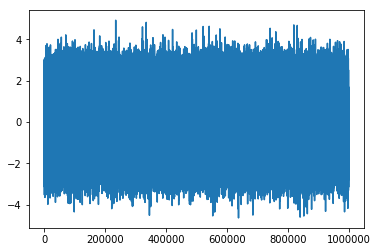

In [5]:
x = range(1,1000001)
plt.plot(x, data)

(array([1.11000e+02, 2.85100e+03, 3.47010e+04, 1.68108e+05, 3.48511e+05,
        3.08685e+05, 1.16728e+05, 1.89760e+04, 1.28900e+03, 4.00000e+01]),
 array([-4.64600477, -3.68944492, -2.73288506, -1.77632521, -0.81976535,
         0.1367945 ,  1.09335436,  2.04991421,  3.00647407,  3.96303392,
         4.91959378]),
 <a list of 10 Patch objects>)

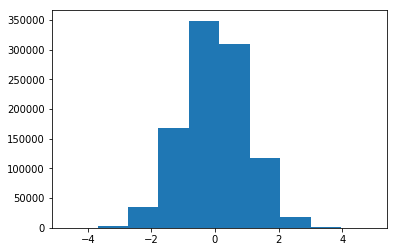

In [6]:
%matplotlib inline
plt.hist(data)

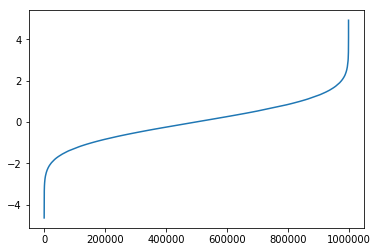

In [7]:
plt.plot(x,sorted(data))

(array([   8.,   99.,  438., 1493., 2811., 2869., 1636.,  536.,   92.,
          18.]),
 array([-4.36404261, -2.41211098, -0.46017936,  1.49175226,  3.44368388,
         5.3956155 ,  7.34754712,  9.29947875, 11.25141037, 13.20334199,
        15.15527361]),
 <a list of 10 Patch objects>)

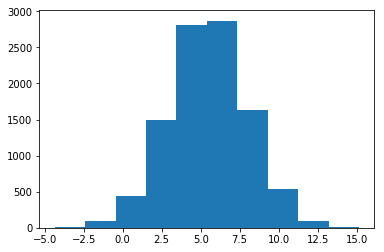

In [8]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[ 1.82612845, -0.89597533, -1.31573942, -0.66642929],
       [ 0.05928248, -0.61195597,  0.29143264,  0.29413126]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos x^2 + y^2
    * Si el valor es inferior a 1 -> estamos dentro del círculo.
    * Si el valor es superior a 1 -> estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.


In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.141323999999999


(3.141323999999999, [<matplotlib.lines.Line2D at 0x1cbce9c0f98>])

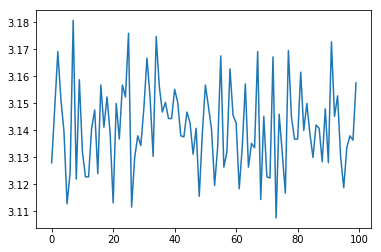

In [11]:
pi_montecarlo(10000, 100)